<a href="https://colab.research.google.com/github/nikenp8384/Kuliah_S2/blob/main/22.01.85.0008datavisualizastion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ShapeAI/Python-for-Data-Science-/master/pokemon.csv')
print(df.shape)
df.head(100)
#

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,drowzee,1,1.0,32.4,66,psychic,NaN,60,48,45,42,43,90
96,97,hypno,1,1.6,75.6,169,psychic,NaN,85,73,70,67,73,115
97,98,krabby,1,0.4,6.5,65,water,NaN,30,105,90,50,25,25
98,99,kingler,1,1.3,60.0,166,water,NaN,55,130,115,75,50,50


## **Pie Charts:**
A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

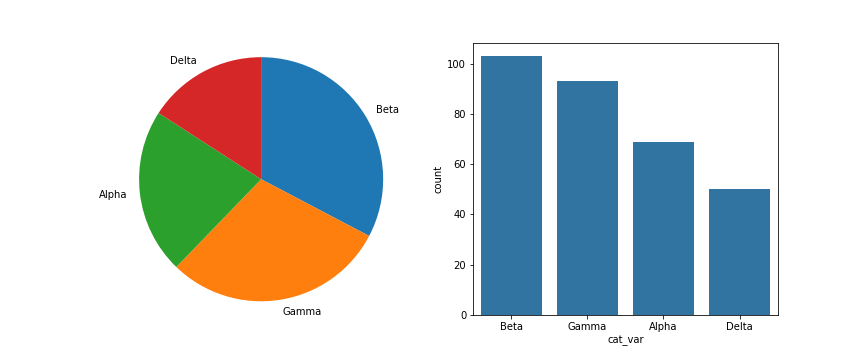

###### Pie chart and barchart displaying the same categorical counts.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

You can create a pie chart with matplotlib's ```pie``` function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

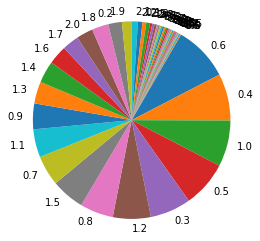

In [10]:
# code for the pie chart seen above
sorted_counts = df['height'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 60,
        counterclock = False);
plt.axis('square');
# generation_id	 diganti dg height, stranggle 90 diganti dengan 60

To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.



## **Additional Variation:**

A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a "wedgeprops" argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

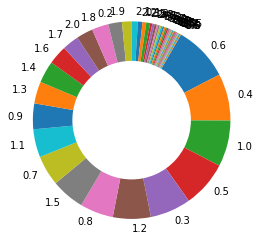

In [16]:
sorted_counts = df['height'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 60,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
#startanggle=90 diganti=60, dan square_id diganti height

## **Histograms:**

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

(array([ 16.,  76., 145., 196., 148., 120.,  63.,  34.,   7.,   2.]),
 array([  5. ,  22.6,  40.2,  57.8,  75.4,  93. , 110.6, 128.2, 145.8,
        163.4, 181. ]),
 <a list of 10 Patch objects>)

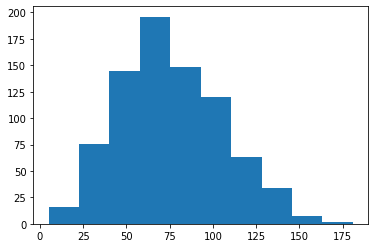

In [17]:
plt.hist(data = df, x = 'attack')
#mengganti speed dengan attack

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data.

(array([ 3.,  3., 12., 13.,  6., 15., 43., 29., 12., 54., 42., 55., 34.,
        19., 57., 49., 48., 16., 24., 40., 37., 32., 10., 36., 36., 16.,
        12., 17., 12.,  6.,  7.,  1.,  5.,  0.,  0.,  1.,  1.,  3.,  0.,
         1.]),
 array([  5.   ,   8.875,  12.75 ,  16.625,  20.5  ,  24.375,  28.25 ,
         32.125,  36.   ,  39.875,  43.75 ,  47.625,  51.5  ,  55.375,
         59.25 ,  63.125,  67.   ,  70.875,  74.75 ,  78.625,  82.5  ,
         86.375,  90.25 ,  94.125,  98.   , 101.875, 105.75 , 109.625,
        113.5  , 117.375, 121.25 , 125.125, 129.   , 132.875, 136.75 ,
        140.625, 144.5  , 148.375, 152.25 , 156.125, 160.   ]),
 <a list of 40 Patch objects>)

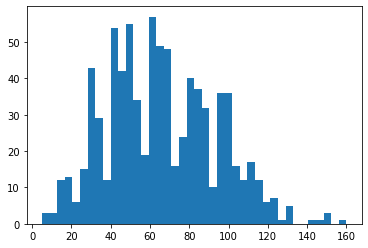

In [18]:
plt.hist(data = df, x = 'speed', bins = 40)
#bins 20 diganti 40

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function.

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

(array([ 0.,  3.,  3., 12.,  0., 18., 12., 42., 34., 12., 54., 42., 55.,
        34., 19., 57., 53., 49., 26., 12., 41., 34., 35., 33., 15., 34.,
        15., 22., 13.,  4.,  7.,  6.,  5.,  0.,  0.,  1.,  1.,  3.,  0.,
         1.]),
 array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
         52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
        104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
        156, 160]),
 <a list of 40 Patch objects>)

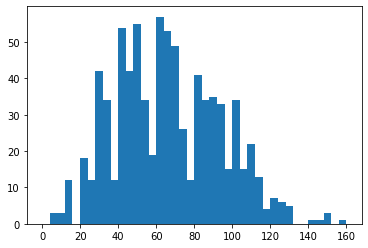

In [19]:
bins = np.arange(0, df['speed'].max()+1, 4)
plt.hist(data = df, x = 'speed', bins = bins)
# arange 0-5, diganti 0-4

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

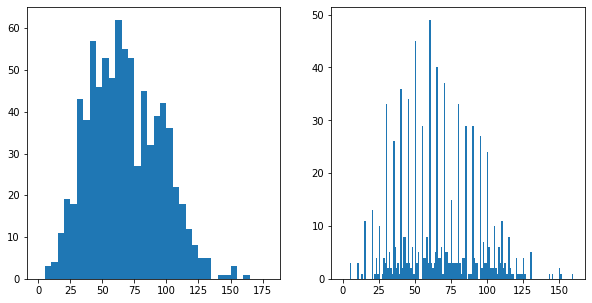

In [20]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['attack'].max()+1, +5)
#speed diganti attack
plt.hist(data = df, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['speed'].max()++1, 1)
plt.hist(data = df, x = 'speed', bins = bin_edges);

## **Alternative Approach**
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

When we specify the data to be plotted, note that the first argument must be the Series or array with the points to be plotted. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and countplot and hist.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


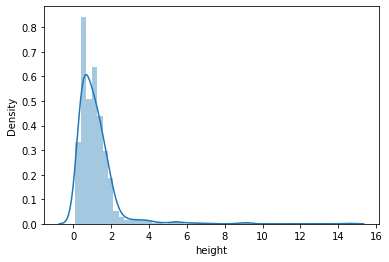

In [23]:
sb.distplot(df['height']);
#speed diganti height

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


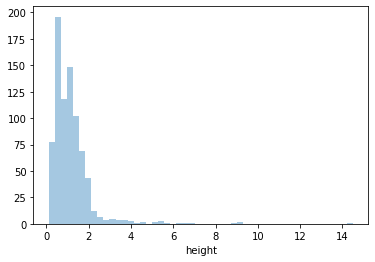

In [24]:
sb.distplot(df['height'], kde=False);
#speed diganti height

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

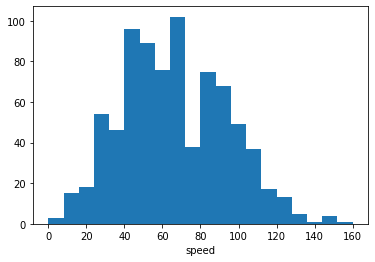

In [25]:
bin_edges = np.arange(0, df['speed'].max()+1, 8)
# arrange 0-5 diganti 0-8
sb.distplot(df['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1});

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.